<a href="https://colab.research.google.com/github/ttjh1234/CSproject_SDA/blob/main/Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로토타입

## 모델 테스트 해보기

6번 사람 1번 행동과 55번 행동에 대해서 테스트 한 번 해보기

해보면서 전체적으로 필요한 부분들 체크하기

### 필요 라이브러리 및 사용자 정의 함수

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
import os
import tensorflow as tf
from tensorflow import keras
import re

In [ ]:
myopenpose=tf.keras.models.load_model('/content/drive/MyDrive/save_model/openpose_singlenet')
my3d=keras.models.load_model("./drive/MyDrive/save_model/3dpose")
mystgcn=keras.models.load_model("./drive/MyDrive/save_model/stgcnrevision2")

In [ ]:
def making_pose_input(df):
  final_input=[]
  if ((df.iloc[8][0]!= None) & (df.iloc[8][1]!=None))&((df.iloc[11][0] != None) & (df.iloc[11][1] != None)):
    hip=((df.iloc[8][0]+df.iloc[11][0])/2,(df.iloc[8][1]+df.iloc[11][1])/2)
    final_input.append(np.float32(hip))
  else:
    final_input.append((np.nan,np.nan))
  right_hip=df.iloc[8]
  final_input.append(np.float32(right_hip))
  right_knee=df.iloc[9]
  final_input.append(np.float32(right_knee))
  right_foot=df.iloc[10]
  final_input.append(np.float32(right_foot))
  left_hip=df.iloc[11]
  final_input.append(np.float32(left_hip))
  left_knee=df.iloc[12]
  final_input.append(np.float32(left_knee))
  left_foot=df.iloc[13]
  final_input.append(np.float32(left_foot))
  spine=df.iloc[1]
  final_input.append(np.float32(spine))
  if ((df.iloc[1][0] != None)&(df.iloc[1][1] != None))&((df.iloc[0][0] != None)&(df.iloc[0][1] != None)):
    thorax=(df.iloc[1][0]*2-(df.iloc[0][0]+df.iloc[1][0])/2,df.iloc[1][1]*2-(df.iloc[0][1]+df.iloc[1][1])/2)
    final_input.append(np.float32(thorax))
  else:
    final_input.append((np.nan,np.nan))
  head=df.iloc[0]
  final_input.append(np.float32(head))
  left_shoulder=df.iloc[5]
  final_input.append(np.float32(left_shoulder))
  left_elbow=df.iloc[6]
  final_input.append(np.float32(left_elbow))
  left_wrist=df.iloc[7]
  final_input.append(np.float32(left_wrist))
  right_shoulder=df.iloc[2]
  final_input.append(np.float32(right_shoulder))
  right_elbow=df.iloc[3]
  final_input.append(np.float32(right_elbow))
  right_wrist=df.iloc[4]
  final_input.append(np.float32(right_wrist))
  return final_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 입력 데이터 전처리 함수
# 모델의 입력
# 나중에 사용할 수도 있는 label 열도 일단은 생성.
def data2d_import(path):
  # 이미지 읽어오기
  image = cv2.imread(path,cv2.IMREAD_COLOR)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image2 = cv2.resize(image, dsize=(368, 368), interpolation=cv2.INTER_AREA)
  image3=np.transpose(np.float32(image2[:,:,:,np.newaxis]), (3,0,1,2))
  return image3

def data_to_skeleton(image):
  output=myopenpose.predict(image)
  H = output[11].shape[1]
  W = output[11].shape[2]
  conf=output[11]
  imageHeight, imageWidth, _ = (368,368,3)
  points = []
  for i in range(0,18):
      # 해당 신체부위 신뢰도 얻음.
      probMap = conf[0, :, :, i]
  
      # global 최대값 찾기
      minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

      # 원래 이미지에 맞게 점 위치 변경
      x = (imageWidth * point[0]) / W
      y = (imageHeight * point[1]) / H     
      points.append((int(x), int(y)))
  return points

def data_to_input(data):
  temp=pd.DataFrame(columns=['x','y'])
  x_list=[]
  y_list=[]
  for i in data:
      x_list.append(i[0])
      y_list.append(i[1])
  temp['x']=x_list
  temp['y']=y_list
  list_temp=making_pose_input(temp)
  a=pd.DataFrame(list_temp,columns=['x','y'])
  return a


def input_making(path):
  image=data2d_import(path)
  points=data_to_skeleton(image)
  result=data_to_input(points)
  return result 

In [ ]:
path1="/content/drive/MyDrive/cv_data/P006/A001_P006_G001_C001/"
path2="/content/drive/MyDrive/cv_data/P006/A001_P006_G001_C002/"
path3="/content/drive/MyDrive/cv_data/P006/A002_P006_G001_C001/"
path4="/content/drive/MyDrive/cv_data/P006/A003_P006_G001_C001/"
path5="/content/drive/MyDrive/cv_data/P006/A053_P006_G001_C001/"

In [ ]:
x=pd.DataFrame(columns=['x','y'])
for i in os.listdir(path1):
  filepath=path1+i;
  temp=input_making(filepath)
  x=pd.concat([x,temp],axis=0)

In [ ]:
x.shape

(480, 2)

In [ ]:
x=pd.DataFrame(columns=['x','y'])
for i in os.listdir(path1):
  filepath=path1+i;
  temp=input_making(filepath)
  x=pd.concat([x,temp],axis=0)
for i in os.listdir(path2):
  filepath=path2+i;
  temp=input_making(filepath)
  x=pd.concat([x,temp],axis=0)
for i in os.listdir(path3):
  filepath=path3+i;
  temp=input_making(filepath)
  x=pd.concat([x,temp],axis=0)
for i in os.listdir(path4):
  filepath=path4+i;
  temp=input_making(filepath)
  x=pd.concat([x,temp],axis=0)
for i in os.listdir(path5):
  filepath=path5+i;
  temp=input_making(filepath)
  x=pd.concat([x,temp],axis=0)

In [ ]:
a=np.array(x[0:16]).reshape(1,16,2)
for i in range(29):
  temp=np.array(x[16*(i+1):16*(i+2)]).reshape(1,16,2)
  a=np.concatenate([a,temp],axis=0)

In [ ]:
a.shape

(150, 16, 2)

In [ ]:
a=np.array(x[0:16]).reshape(1,16,2)
for i in range(29):
  temp=np.array(x[16*(i+1):16*(i+2)]).reshape(1,16,2)
  a=np.concatenate([a,temp],axis=0)
for i in range(29,59,1):
  temp=np.array(x[16*(i+1):16*(i+2)]).reshape(1,16,2)
  a=np.concatenate([a,temp],axis=0)
for i in range(59,89,1):
  temp=np.array(x[16*(i+1):16*(i+2)]).reshape(1,16,2)
  a=np.concatenate([a,temp],axis=0)
for i in range(89,119,1):
  temp=np.array(x[16*(i+1):16*(i+2)]).reshape(1,16,2)
  a=np.concatenate([a,temp],axis=0)
for i in range(119,149,1):
  temp=np.array(x[16*(i+1):16*(i+2)]).reshape(1,16,2)
  a=np.concatenate([a,temp],axis=0)

In [ ]:
x_a=tf.stack(a)
x_a.shape

TensorShape([150, 16, 2])

In [ ]:
y_a=my3d.predict(x_a)

In [ ]:
y_a.shape

(150, 51)

In [ ]:
y2=y_a.reshape(150,17,3)
y3=y2.reshape(5,30,17,3,1)

In [ ]:
#y2=y_a.reshape(30,17,3)
#y3=y2.reshape(5,30,17,3,1)
x_b=tf.stack(y3)
x_2=tf.transpose(x_b,[0,3,1,2,4])

In [ ]:
pred=mystgcn.predict(x_2)

In [ ]:
yp=np.argmax(np.array(pred),axis=1)

In [ ]:
pred

array([[  9.095541 , -11.079036 ],
       [  6.6532702,  -8.322563 ],
       [  8.043001 , -17.053904 ],
       [  7.092021 ,  -8.9286585],
       [ -2.112106 ,   1.44903  ]], dtype=float32)

In [ ]:
yp

array([0, 0, 0, 0, 1])

In [ ]:
image = cv2.imread("./test.jpg",cv2.IMREAD_COLOR)

In [ ]:
image

(320, 480, 3)

In [ ]:
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
320*480*3

460800

In [ ]:
np.array(image)

array([[[ 98,  81,  55],
        [ 98,  81,  55],
        [ 98,  81,  55],
        ...,
        [113,  94,  79],
        [113,  94,  79],
        [113,  94,  79]],

       [[ 98,  81,  55],
        [ 98,  81,  55],
        [ 98,  81,  55],
        ...,
        [113,  94,  79],
        [113,  94,  79],
        [113,  94,  79]],

       [[ 98,  81,  55],
        [ 98,  81,  55],
        [ 98,  81,  55],
        ...,
        [113,  94,  79],
        [113,  94,  79],
        [113,  94,  79]],

       ...,

       [[148, 131, 105],
        [148, 131, 105],
        [148, 131, 105],
        ...,
        [ 83,  76,  57],
        [ 84,  77,  58],
        [ 85,  78,  59]],

       [[148, 131, 105],
        [148, 131, 105],
        [148, 131, 105],
        ...,
        [ 83,  76,  57],
        [ 84,  77,  58],
        [ 85,  78,  59]],

       [[148, 131, 105],
        [148, 131, 105],
        [148, 131, 105],
        ...,
        [ 83,  76,  57],
        [ 84,  77,  58],
        [ 85,  78,  59]]

In [ ]:
image.shape

(320, 480, 3)

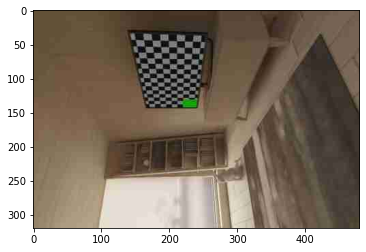

In [ ]:
plt.imshow(image)

In [ ]:
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = cv2.resize(image, dsize=(368, 368), interpolation=cv2.INTER_AREA)
image3=np.transpose(np.float32(image2[:,:,:,np.newaxis]), (3,0,1,2))

## 텐서라이트

In [ ]:
import tensorflow as tf

In [ ]:
saved_model_dir='/content/drive/MyDrive/saved_model/my_model'

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()
open("./drive/MyDrive/openpose.tflite", "wb").write(tflite_quantized_model)

52661600

In [ ]:
saved_model_dir2="./drive/MyDrive/save_model/3dpose"

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()
open("./drive/MyDrive/3dpose.tflite", "wb").write(tflite_quantized_model)

4305680

In [ ]:
saved_model_dir3="./drive/MyDrive/save_model/stgcn2d"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir3)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()
open("./drive/MyDrive/stgcn.tflite", "wb").write(tflite_quantized_model)

8481680

## Flask 서버

In [ ]:
import flask
from flask import Flask, request, render_template
import numpy as np
from scipy import misc

In [ ]:
!pip install flask-ngrok

In [ ]:
# Install useful stuff
! apt install --yes ssh screen nano htop ranger git > /dev/null
# SSH setting
! echo "root:" | chpasswd
! echo "PasswordAuthentication yes" > /etc/ssh/sshd_config
! echo "PermitUserEnvironment yes" >> /etc/ssh/sshd_config
! echo "PermitRootLogin yes" >> /etc/ssh/sshd_config
! service ssh restart > /dev/null
# Download ngrok
! wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -qq -n ngrok-stable-linux-amd64.zip
# Run ngrok
authtoken = "28qN5PcOGaW131RA45nmReoWjrE_7Uj5HJRPfL6Zgg1Mrt8kr"
get_ipython().system_raw('./ngrok authtoken $authtoken && ./ngrok tcp 22 &')
! sleep 3
# Get the address for SSH
import requests
from re import sub
r = requests.get('http://localhost:4040/api/tunnels')
str_ssh = r.json()['tunnels'][0]['public_url']
str_ssh = sub("tcp://", "", str_ssh)
str_ssh = sub(":", " -p ", str_ssh)
str_ssh = "ssh root@" + str_ssh
print(str_ssh)



No password supplied
No password supplied
No password supplied
chpasswd: (user root) pam_chauthtok() failed, error:
Authentication token manipulation error
chpasswd: (line 1, user root) password not changed
ssh root@0.tcp.ngrok.io -p 16065


In [ ]:
from flask import Flask,jsonify
from flask_ngrok import run_with_ngrok

In [ ]:
dataprocess=dataflow(myopenpose,my3d,mystgcn)

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)
count = 0
temp=np.zeros((1,368,368,3))
@app.route("/")
def renderHtml():
    return "Hello World"

# 파일 업로드
@app.route(
    "/fileUpload", methods=["GET", "POST"]
)  # GET = 특정 url을 요청, POST = 값을 넘겨주며 url을 요청
def uploadFile():
  global count
  global temp
  if request.method == "POST":
    print("========================업로드 작동========================")
    count+=1
    contents = request.get_json(force=True, silent=True)
    x=contents["0"]
    a=np.array(list(map(int, x[1:-1].split(','))))
    p2=np.array(yuv2rgb(a))
    p3=np.transpose(p2,[1,0,2])
    p4=np.uint8(p3)
    image2 = cv2.resize(p4, dsize=(368, 368), interpolation=cv2.INTER_AREA)
    image3=np.array(image2)[np.newaxis]
    temp=np.concatenate([temp,image3],axis=0)
    print(count)
    if count==30:
      x_1=temp[1:]
      x_2=tf.stack(x_1)
      x_3=np.float64(x_2)
      
      c=dataprocess.input_to_3dpose(x_3)
      c=dataprocess.pose3d(c)
      c=test3=dataprocess.stgcn(c)
      count=0
      temp=np.zeros((1,368,368,3))
      return jsonify(int(np.argmax(c,axis=1)[0]))
    else:
      return jsonify(-1)    


if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
app = Flask(__name__)
run_with_ngrok(app)
@app.route("/")
def hello():
    return "Hello World!"

if __name__ == '__main__':
    app.run()  # If address is in use, may need to terminate other sessions:
               # Runtime > Manage Sessions > Terminate Other Sessions

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://2c7a-34-91-139-192.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [08/May/2022 14:01:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/May/2022 14:01:10] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)
model=dataflow(myopenpose,my3d,mystgcn)

In [ ]:
@app.route('/predict', methods=['POST'])
def predict():
  if request.method == 'POST':
      file = request.files['file']
      img_bytes = file.read()
      c=model.dataprocess.input_to_3dpose(c)
      c=dataprocess.input_to_3dpose(c)
      c=test3=dataprocess.stgcn(c)
      result=np.argmax(c,axis=1)
      return flask.jsonify({'result': result})



if __name__ == '__main__':
    app.run()  # If address is in use, may need to terminate other sessions:
               # Runtime > Manage Sessions > Terminate Other Sessions

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://8af8-34-91-233-199.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/May/2022 17:50:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2022 17:50:31] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
import json
with open('./drive/MyDrive/bigfile.json', 'r') as f:
  json_data = json.load(f)

x=json_data["1"]

In [ ]:
import json
def patch_data():
  with open('./drive/MyDrive/bigfile.json', 'r') as f:
    json_data = json.load(f)
  
  temp=np.zeros((1,368,368,3))
  for i in range(30):
    x=json_data[str(i+1)]
    a=np.array(list(map(int, x[1:-1].split(','))))
    p2=np.array(yuv2rgb(a))
    p3=np.transpose(p2,[1,0,2])
    p4=np.uint8(p3)
    image2 = cv2.resize(p4, dsize=(368, 368), interpolation=cv2.INTER_AREA)
    image3=np.array(image2)[np.newaxis]
    temp=np.concatenate([temp,image3],axis=0)
  temp2=tf.stack(temp)
  temp3=np.float64(temp2)

  return temp3

In [ ]:
x_data=patch_data()

In [ ]:
def yuv2rgb(yuv):
  height = 240
  width = 320
  size = height * width
  rgb = [[None] * width for _ in range(height)]
  for i in range(height):
      for j in range(width):
          idx_y = i * width + j
          idx_u = int(size + (i // 2) * width + (j // 2) * 2)
          idx_v = int(size + (i // 2) * width + (j // 2) * 2) + 1

          y = 0xFF & yuv[idx_y]
          u = 0xFF & yuv[idx_u]
          v = 0xFF & yuv[idx_v]

          r = int(y + 1.402 * (v - 128))
          g = int(y - 0.344 * (u - 128) - 0.714 * (v - 128))
          b = int(y + 1.772 * (u - 128))

          if r < 0:
              r = 0
          if g < 0:
              g = 0
          if b < 0:
              b = 0

          if r > 255:
              r = 255
          if g > 255:
              g = 255
          if b > 255:
              b = 255

          rgb[i][j] = [b, g, r]
  return rgb

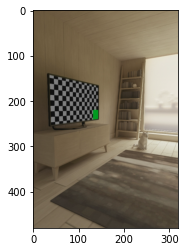

In [ ]:
plt.imshow(np.transpose(p2,[1,0,2]))